# Visualizing with the `seaborn`
***

In [1]:
%matplotlib inline

# standard
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# I've got style,
# miles and miles
import seaborn as sns
sns.set()
sns.set_context('notebook', font_scale=1.5)
cp = sns.color_palette()

/Users/squiresrb/anaconda/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<br/>

### Thing 1: Line Chart (with many lines)
***

In [2]:
ts = pd.read_csv('data/ts.csv')

# casting to datetime is important for
# ensuring plots "just work"
ts = ts.assign(dt = pd.to_datetime(ts.dt))
ts.head()

,dt,kind,value
0,2000-01-01,A,1.442521
1,2000-01-02,A,1.981290
2,2000-01-03,A,1.586494
3,2000-01-04,A,1.378969
4,2000-01-05,A,-0.277937


In [3]:
# in matplotlib-land, the notion of a "tidy"
# dataframe matters not
dfp = ts.pivot(index='dt', columns='kind', values='value')
dfp.head()

kind,A,B,C,D
dt,,,,
2000-01-01,1.442521,1.808741,0.437415,0.096980
2000-01-02,1.981290,2.277020,0.706127,-1.523108
2000-01-03,1.586494,3.474392,1.358063,-3.100735
2000-01-04,1.378969,2.906132,0.262223,-2.660599
2000-01-05,-0.277937,3.489553,0.796743,-3.417402


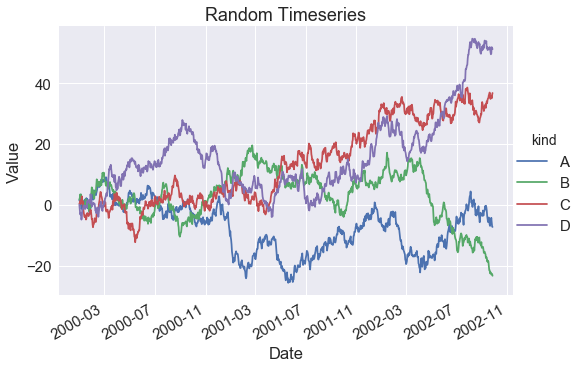

In [4]:
g = sns.FacetGrid(ts, hue='kind', size=5, aspect=1.5)
g.map(plt.plot, 'dt', 'value').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Value',
         title='Random Timeseries')
g.fig.autofmt_xdate()

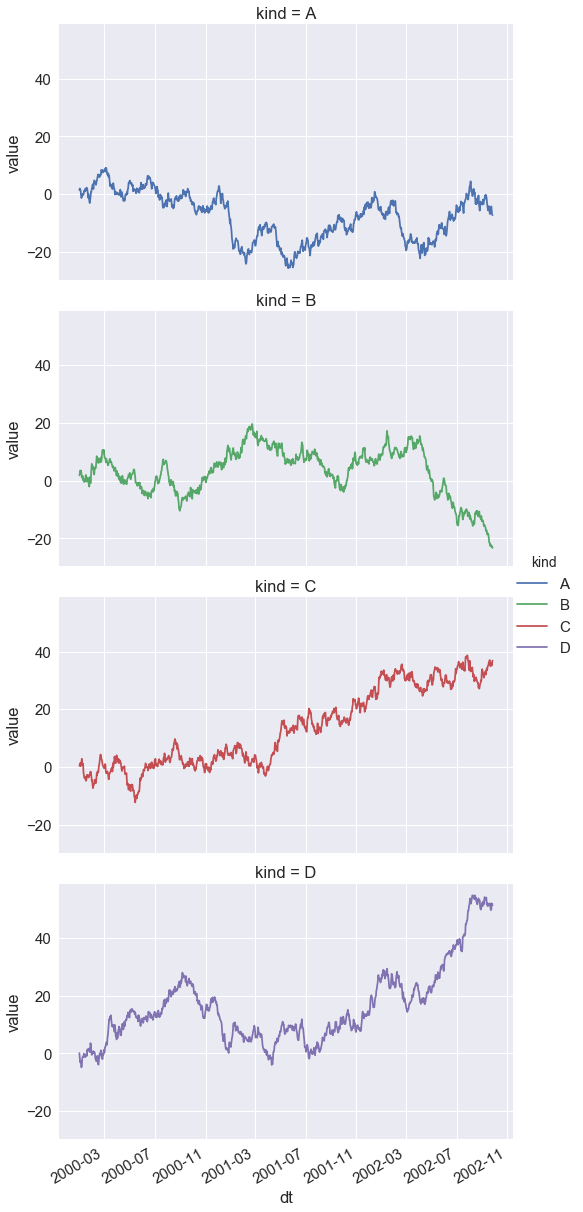

In [5]:
g = sns.FacetGrid(ts, row='kind', hue='kind', size=5, aspect=1.5)
g.map(plt.plot, 'dt', 'value').add_legend()

g.fig.autofmt_xdate()

<br/>

### Thing 2: Scatter
***

In [6]:
df = pd.read_csv('data/iris.csv')
df.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


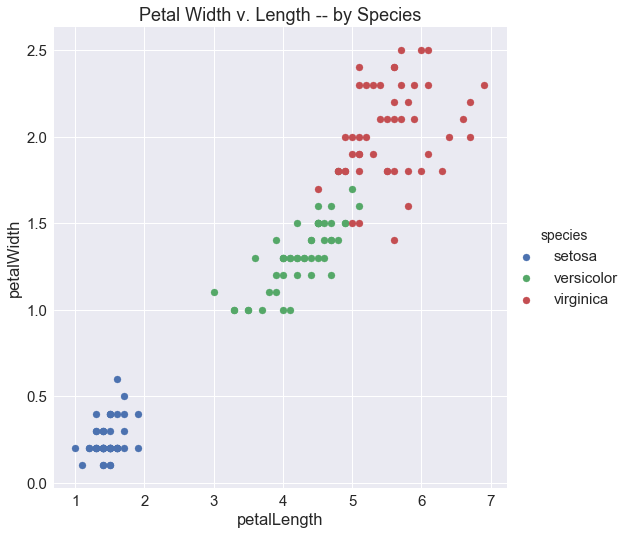

In [7]:
g = sns.FacetGrid(df, hue='species', size=7.5)
g.map(plt.scatter, 'petalLength', 'petalWidth').add_legend()
g.ax.set_title('Petal Width v. Length -- by Species')

<br/>

### Thing 3: Trellising the Above
***

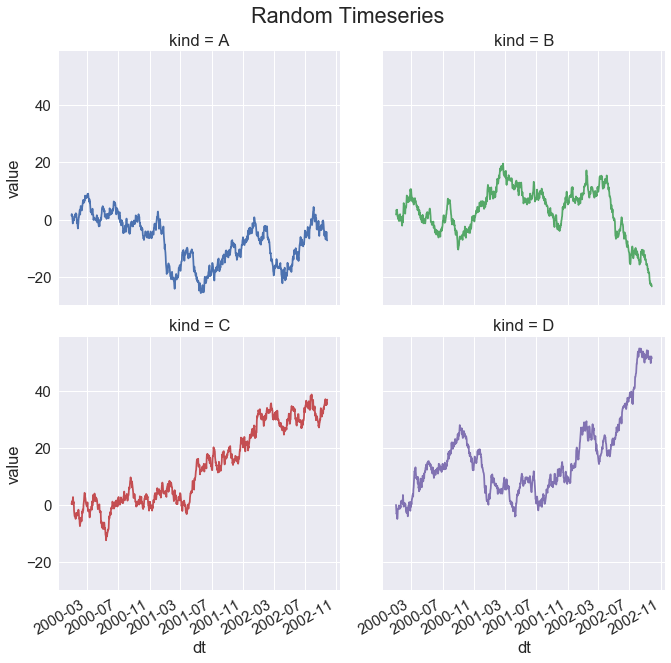

In [8]:
g = sns.FacetGrid(ts, hue='kind',
                  col='kind', col_wrap=2, size=5)

g.map(plt.plot, 'dt', 'value')
g.fig.autofmt_xdate()
g.fig.suptitle('Random Timeseries', y=1.01)

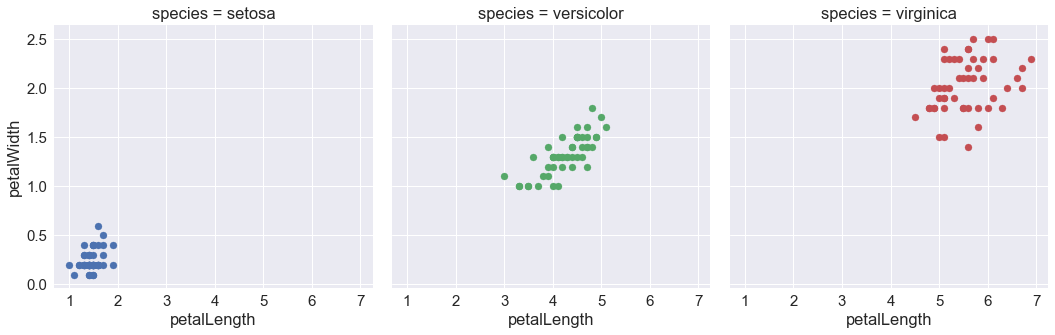

In [9]:
g = sns.FacetGrid(df, col='species', hue='species', size=5)
g.map(plt.scatter, 'petalLength', 'petalWidth')

In [10]:
tmp_n = df.shape[0] - df.shape[0]/2

df['random_factor'] = np.random.permutation(['A'] * tmp_n + ['B'] * (df.shape[0] - tmp_n))
df.head()

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
g = sns.FacetGrid(df.assign(tmp=df.species + df.random_factor).\
                      sort_values(['species', 'random_factor']),
                  col='species', row='random_factor', hue='tmp', size=5)
g.map(plt.scatter, 'petalLength', 'petalWidth')

<br/>

### Thing 4: Visualizing Distributions (Boxplot and Histogram)
***

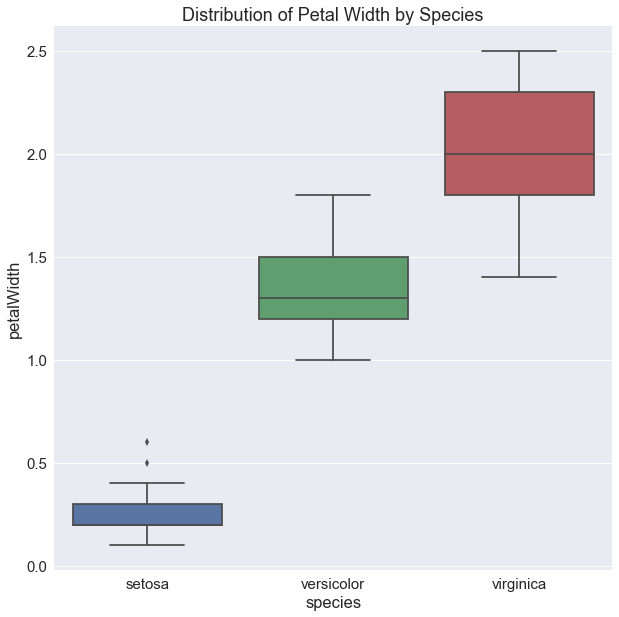

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

g = sns.boxplot('species', 'petalWidth', data=df, ax=ax)
g.set(title='Distribution of Petal Width by Species')

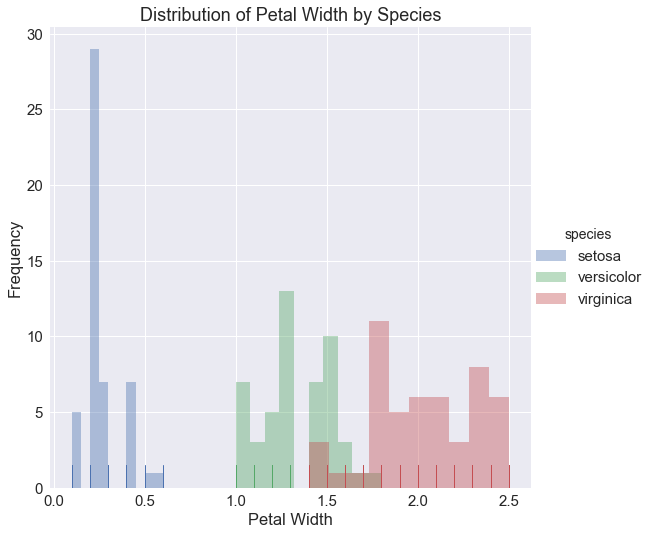

In [12]:
g = sns.FacetGrid(df, hue='species', size=7.5)

g.map(sns.distplot, 'petalWidth', bins=10,
      kde=False, rug=True).add_legend()

g.set(xlabel='Petal Width',
      ylabel='Frequency',
      title='Distribution of Petal Width by Species')

<br/>

### Thing 5: Bar Chart
***

In [13]:
df = pd.read_csv('data/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
dfg = df.groupby(['survived', 'pclass']).agg({'fare': 'mean'})
dfg

fare
survived pclass           
0        1       64.684008
         2       19.412328
         3       13.669364
1        1       95.608029
         2       22.055700
         3       13.694887

In [15]:
died = dfg.loc[0, :]
survived = dfg.loc[1, :]

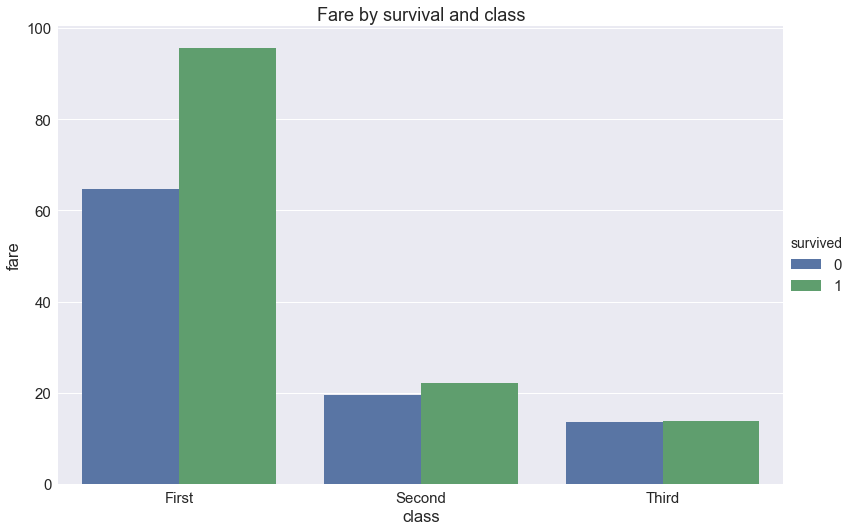

In [16]:
g = sns.factorplot(x='class', y='fare', hue='survived',
                   data=df, kind='bar',
                   order=['First', 'Second', 'Third'],
                   size=7.5, aspect=1.5, ci=None)
g.ax.set_title('Fare by survival and class')

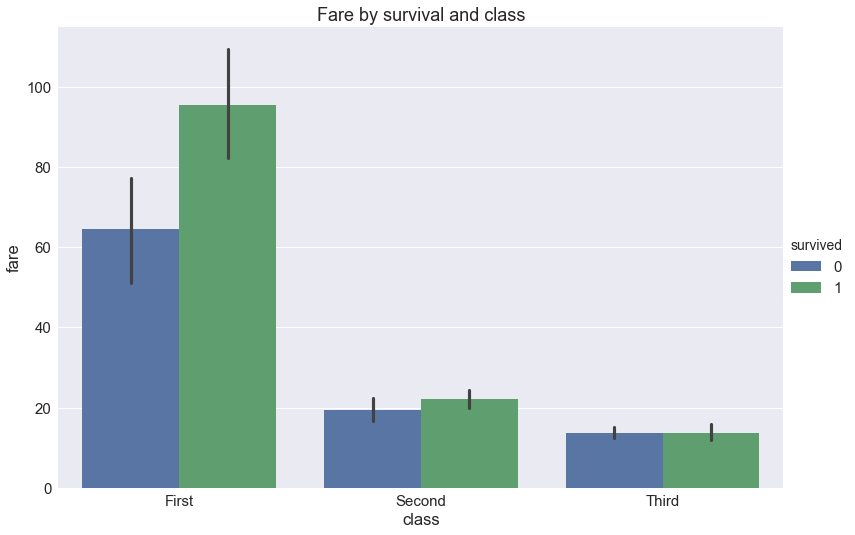

In [17]:
g = sns.factorplot(x='class', y='fare', hue='survived',
                   data=df, kind='bar',
                   order=['First', 'Second', 'Third'],
                   size=7.5, aspect=1.5)
g.ax.set_title('Fare by survival and class')